In [241]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [242]:
plt.rcParams.update({'font.size': 22})

# Checking Progress of FAH Project

This notebook uses API calls to pull down project data about how much data a FAH project\
has collected so far. With this you can check for the progress of projects. 

## Define key variables

Also define paths to your license and key files.

In [324]:
project_number = 17637
num_ns_per_wu = 10 # 10 ns per work unit - this could change depending on the project
license_path = "/home/sukrit/licenses/fah-cert-sukritsingh.pem"
key_path = "/home/sukrit/licenses/private-fah-sukritsingh.pem"
work_server_url = "https://pllwskifah2.mskcc.org"

Now use requests and json to pull down the JSON file returned by the API

In [325]:
# use requests to get the project data
r = requests.get("%s/api/projects/%s" % (work_server_url, project_number), cert=(license_path, key_path))
project_data = r.json()

## Process Database

In [326]:
wu_hist = np.asarray(project_data['histogram'])
wu_gens = int(project_data['gens']) # the max number of possible generations being histogrammed
wu_total = int(project_data['gens_completed'])
print(wu_gens)
print(wu_total*num_ns_per_wu)

1000
146760


In [327]:
# Condense the histogram to stop at the last generation with work units
# find where the last work unit was generated
trunc_ind = np.where(wu_hist > 0)[0][-1] # trunc_ind indicates the bin that contains the longest trajectory
wu_hist_trunc = wu_hist[:trunc_ind+1] # truncate the histogram to only include the bins with work units

# Convert trunc_ind also to the max possible generation run
trunc_gen = (trunc_ind*wu_gens)/1000 # we divide by number of buckets
gen_vals = np.linspace(0, int(trunc_gen)+1, num=trunc_ind+1)

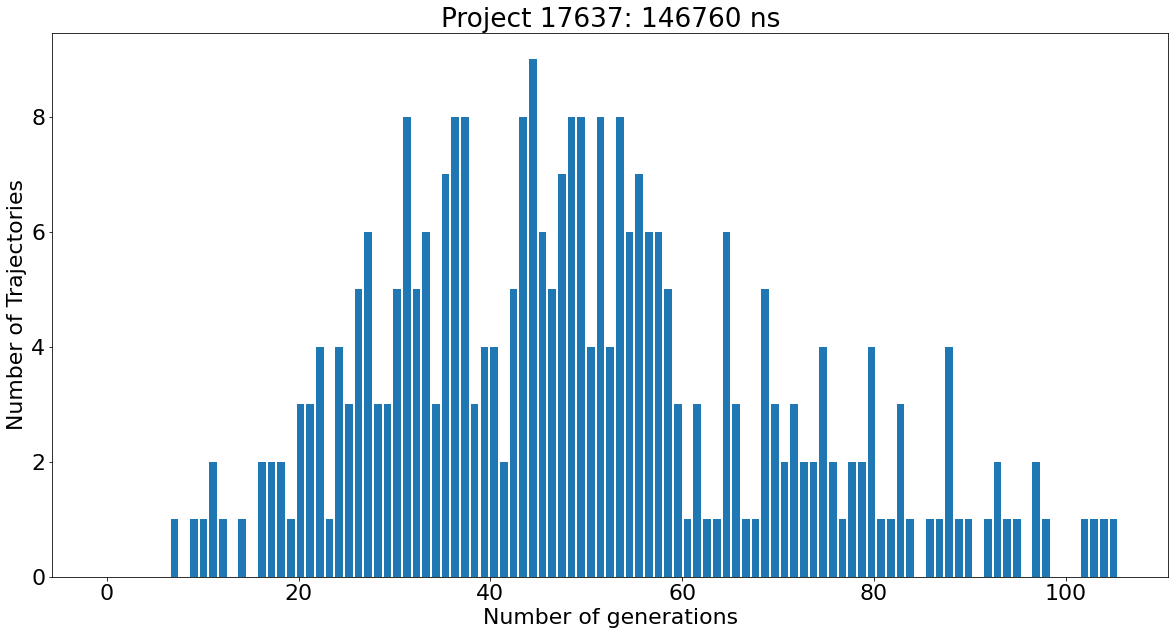

In [335]:
# Plot the histogram
ax = plt.figure(figsize=(20,10))
plt.bar(gen_vals, wu_hist_trunc)    
plt.xlabel("Number of generations")
plt.ylabel("Number of Trajectories")
plt.title("Project %s: %s ns" % (project_number, wu_total*num_ns_per_wu))
plt.show()


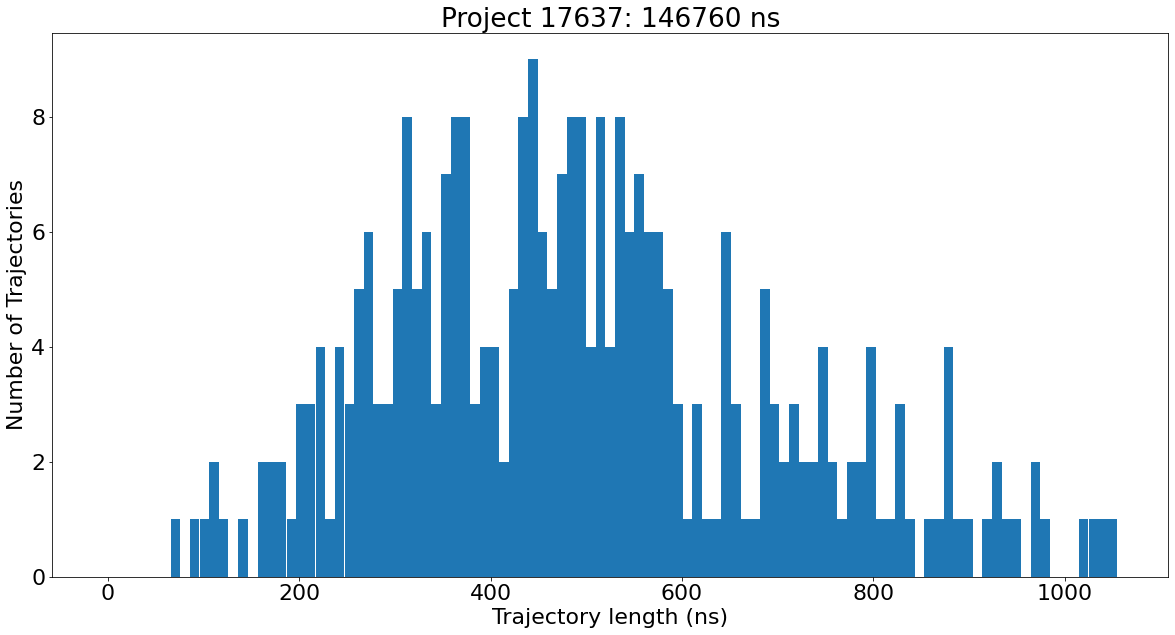

In [334]:
# Plot the histogram but for trajectory length
plt.figure(figsize=(20,10))
plt.bar(gen_vals*num_ns_per_wu,wu_hist_trunc, width=num_ns_per_wu)
plt.xlabel("Trajectory length (ns)")
plt.ylabel("Number of Trajectories")
plt.title("Project %s: %s ns" % (project_number, wu_total*num_ns_per_wu))
plt.show()


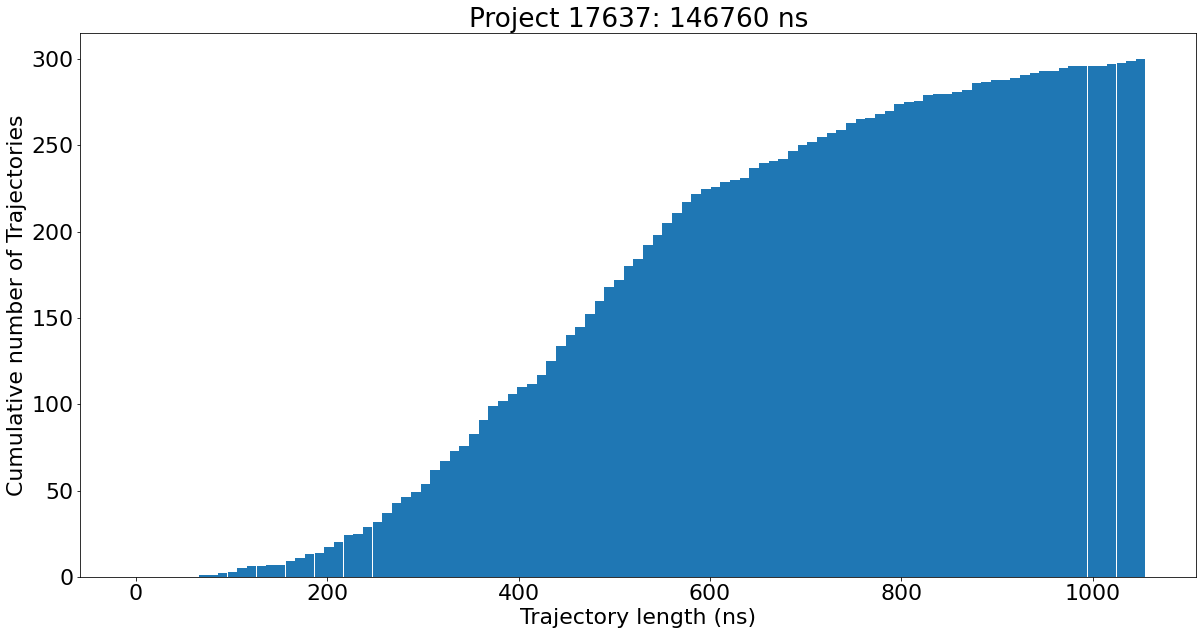

In [333]:
# Plot the cumulative histogram along trajectory length
plt.figure(figsize=(20,10))

# Get the cumulative histogram
cum_hist = np.cumsum(wu_hist_trunc)
plt.bar(gen_vals*num_ns_per_wu,cum_hist, width=num_ns_per_wu)
plt.xlabel("Trajectory length (ns)")
plt.ylabel("Cumulative number of Trajectories")
plt.title("Project %s: %s ns" % (project_number, wu_total*num_ns_per_wu))
plt.show()
